<a href="https://colab.research.google.com/github/Shivachikkonda02/-Bank-Marketing-Analysis-and-Classification-ML-Project/blob/main/ARIMA%2C_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/airplane-passengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df['Month']=pd.to_datetime(df['Month'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df.set_index('Month',inplace=True)

In [9]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


<Axes: xlabel='Month'>

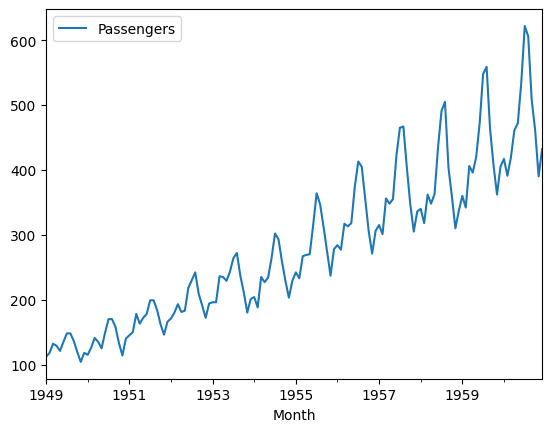

In [11]:
df.plot()

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
seasonal=seasonal_decompose(df)

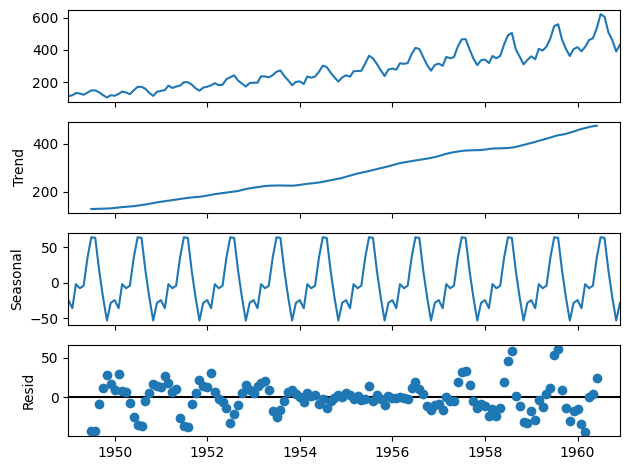

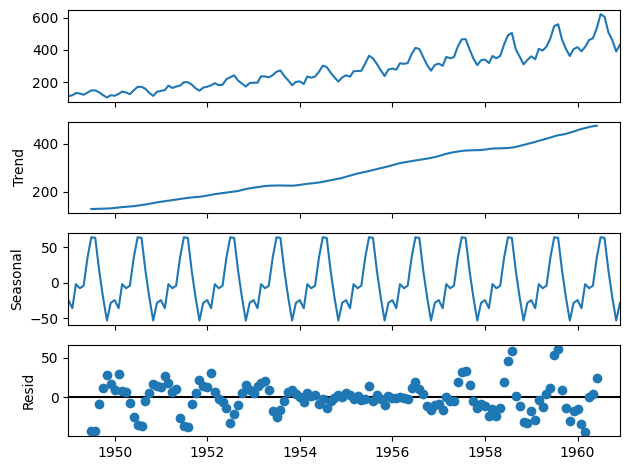

In [14]:
seasonal.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
  result=adfuller(series)
  print("ADF Statistics:",result[0])
  print("p-value:",result[1])
  print('no of lags used:',result[2])
  print('number of observations:',result[3])
  print('critical vlaues:',result[4])

In [19]:
adf_test(df['Passengers'])

ADF Statistics: 0.8153688792060498
p-value: 0.991880243437641
no of lags used: 13
number of observations: 130
critical vlaues: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [20]:
df['passengers first difference']=df['Passengers'].diff(1)

In [21]:
df.head()

,Passengers,passengers first difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [31]:
df['passengers 12 diff']=df['Passengers'].diff(12)

In [32]:
df.head(13)

,Passengers,passengers first difference,passengers 12 diff,passengers 12 diff
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,NaN,NaN
1949-05-01,121,-8.0,NaN,NaN
1949-06-01,135,14.0,NaN,NaN
1949-07-01,148,13.0,NaN,NaN
1949-08-01,148,0.0,NaN,NaN
1949-09-01,136,-12.0,NaN,NaN


In [26]:
adf_test(df['passengers first difference'].dropna())

ADF Statistics: -2.8292668241700047
p-value: 0.05421329028382478
no of lags used: 12
number of observations: 130
critical vlaues: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [33]:
adf_test(df['passengers 12 diff'].dropna())

ADF Statistics: -3.383020726492481
p-value: 0.011551493085514952
no of lags used: 1
number of observations: 130
critical vlaues: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


<Axes: xlabel='Month'>

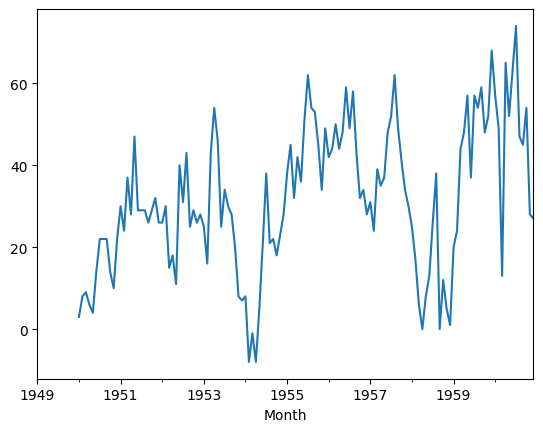

In [38]:
df['passengers 12 diff'].plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

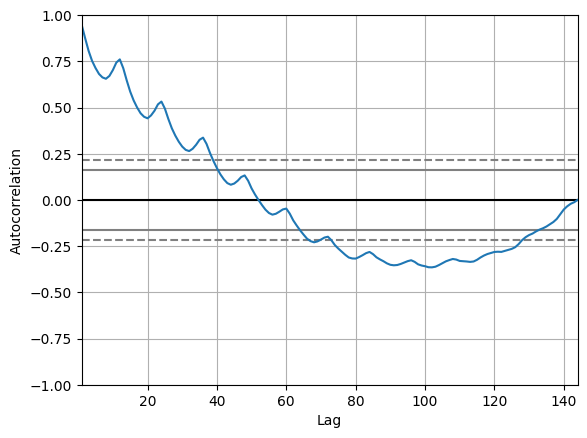

In [39]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Passengers'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

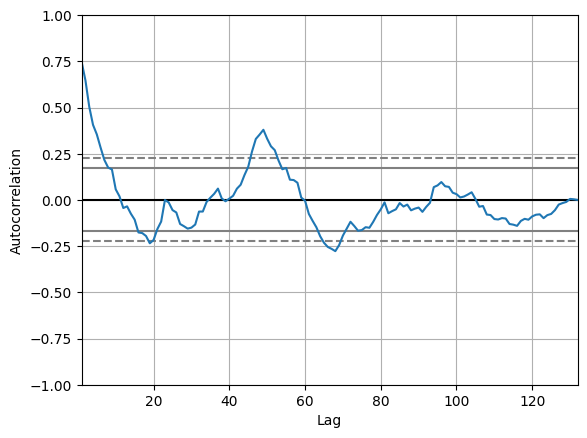

In [41]:
autocorrelation_plot(df['passengers 12 diff'].dropna())

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

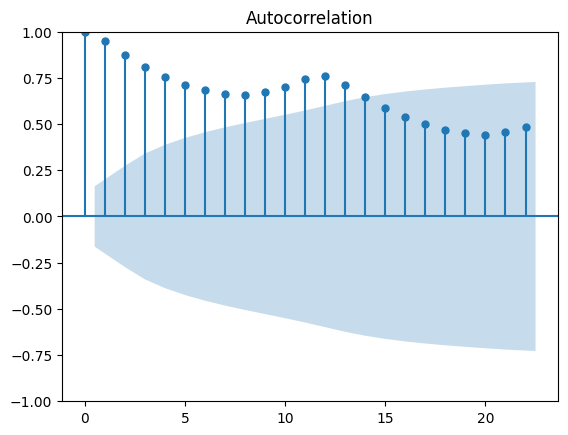

In [48]:
acf=plot_acf(df['Passengers'])

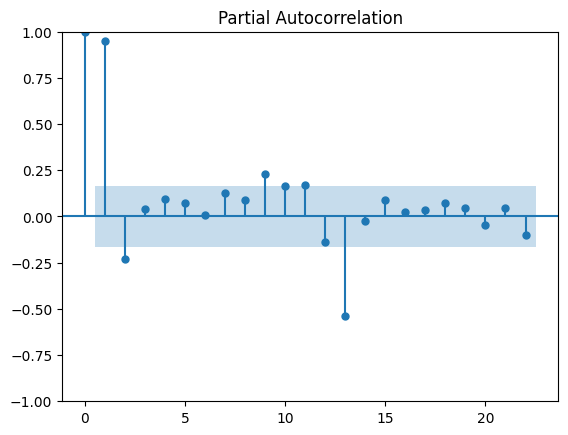

In [49]:
pacf=plot_pacf(df['Passengers'])

In [50]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
model=ARIMA(df['Passengers'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Sat, 08 Jun 2024   AIC                           1394.683
Time:                        12:09:18   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.000     751.362    1172.492
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.65   Prob(JB):                         0.34
Heteroskedasticity (H):               7.00   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

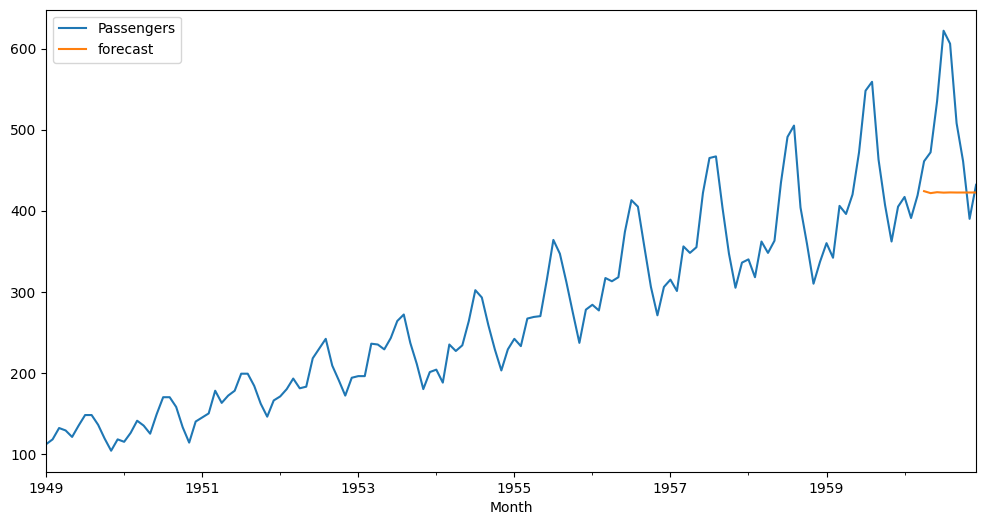

In [58]:
df['forecast'] = model_fit.predict(start=135, end=145, dynamic=True)
df[['Passengers', 'forecast']].plot(figsize=(12, 6))

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [60]:
result=SARIMAX(df['Passengers'],order=(1,1,1),seasonal_order=(1,1,1,12))
result_fit=result.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

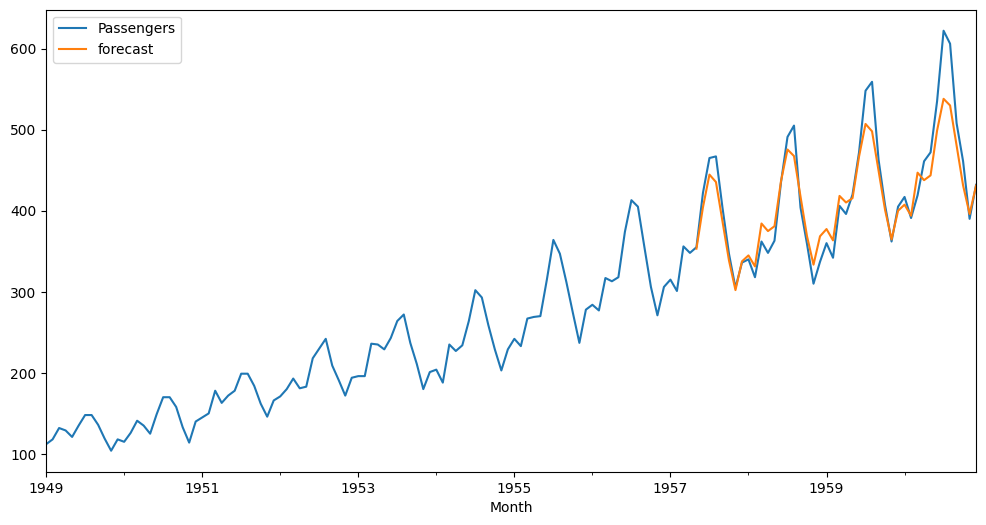

In [85]:
df['forecast']=result_fit.predict(start=100,end=145,dynamic=True)
df[['Passengers', 'forecast']].plot(figsize=(12,6))

In [79]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range (0,24)]

In [80]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [81]:
future_df=pd.concat([df,future_dataset_df])

In [88]:
future_df.drop(columns='passengers 12 diff',inplace=True)

<Axes: >

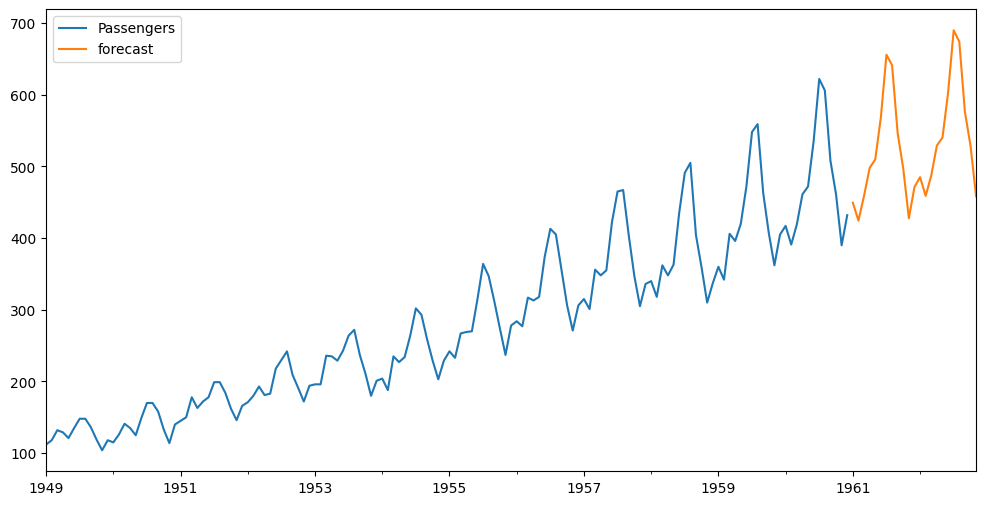

In [89]:
future_df['forecast']=result_fit.predict(start=144,end=170,dynamic=True)
future_df[['Passengers','forecast']].plot(figsize=(12,6))